# Chapter 14: Introduction to Reinforcement Learning



New Skills in This Chapter

• Understanding how reinforcement learning works

• Implementing tabular Q-learning in Frozen Lake

• Creating a game environment for Frozen Lake

• Using the trained Q-table to win a game

• Training a Q-table from scratch

***
*Like a human, our agents learn for themselves to achieve successful strategies that lead to the greatest long-term rewards. This paradigm of learning by trial-and-error, solely from rewards or punishments, is known as reinforcement learning (RL).*
***
-- DeepMind, 2016

***

In [1]:
import os

os.makedirs("files/ch14", exist_ok=True)

# 14.1. Basics of Reinforcement Learning

# 14.2. Use Q-Values to Play the Frozen Lake Game

## 14.2.2. A Q-Table to Win the Frozen Lake Game

In [2]:
import numpy as np

Q=np.loadtxt('files/ch14/Qtable.csv', delimiter=",")

In [3]:
def play_game():
    state=env.reset()
    env.render()
    while True:
        action=np.argmax(Q[state,:])
        print(f'current state is {state} and action is {action}')
        state,reward,done,_=env.step(action)
        env.render()
        if done==True:
            if reward==1:
                print('Congratulations, you won!')
            else:
                print('Sorry, better luck next time.')
            break 

In [4]:
import gym

env=gym.make('FrozenLake-v0',is_slippery=False)
env.reset()
play_game()
env.close()


SFFF
FHFH
FFFH
HFFG
current state is 0 and action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
current state is 4 and action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
current state is 8 and action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
current state is 9 and action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
current state is 13 and action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
current state is 14 and action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Congratulations, you won!


# 14.3. Train the Q-Values

## 14.3.1. What Is Q-Learning?

## 14.3.2. Let the Learning Begin

In [5]:
def update_Q(episode):
    # The initial state is the starting position (state 0)
    state=env.reset() 
    # The cutoff value for exploration
    cutoff=min_exp+(max_exp-min_exp)*episode/max_episode
    # Play a game
    for _ in range(max_steps):
        # Exploitation
        if np.random.uniform(0,1,1)>cutoff:
            action=np.argmax(Q[state, :])
        # Exploration
        else:
            action=env.action_space.sample()
        # Use the selected action to make the move
        new_state,reward,done,_=env.step(action)
        # Update Q values
        if done==True:
            Q[state,action]=reward
            break    
        else:
            Q[state,action]=lr*(reward+gamma*np.max(\
                Q[new_state,:]))+(1-lr)*Q[state,action]
            state=new_state    

In [6]:
lr=0.6
gamma=0.9
max_exp=0.7
min_exp=0.3
max_steps=50
max_episode=10000

# Set Q-values to zeros at first 
Q=np.zeros((16, 4))
# Train the Q-table for 10,000 episodes
env.reset()
for episode in range(max_episode):
    update_Q(episode)
# Print out and save the trained Q-table   
Q=np.round(Q,4)
print(Q) 
np.savetxt("files/ch14/trained_Q.csv",Q,delimiter=',')

[[0.5314 0.5905 0.5905 0.5314]
 [0.5314 0.     0.6561 0.5905]
 [0.5905 0.729  0.5905 0.6561]
 [0.6561 0.     0.5905 0.5905]
 [0.5905 0.6561 0.     0.5314]
 [0.     0.     0.     0.    ]
 [0.     0.81   0.     0.6561]
 [0.     0.     0.     0.    ]
 [0.6561 0.     0.729  0.5905]
 [0.6561 0.81   0.81   0.    ]
 [0.729  0.9    0.     0.729 ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.81   0.9    0.729 ]
 [0.81   0.9    1.     0.81  ]
 [0.     0.     0.     0.    ]]


# 14.4. Q-Learning in A Self-Made Game Environment

## 14.4.1. A Self-Made Frozen Lake Game Environment

In [7]:
from utils.frozenlake_env import Frozen

env=Frozen()
env.reset()                    
env.render()

In [8]:
env.close()

In [9]:
env=Frozen()
# check the action space
number_actions=env.action_space.n
print("the number of possible actions are",number_actions)
# check the shape of the observation space
print("the shape of the observation space is",\
      env.observation_space.shape)

the number of possible actions are 4
the shape of the observation space is (16,)


## 14.4.2. Use the Q-Table in the Self-Made Game Environment 

In [10]:
import time
# Use the Q-table you just trained
Q=np.loadtxt('files/ch14/trained_Q.csv',delimiter=",")
def use_trained_Q():
    state=env.reset()
    env.render()
    while True:
        # Show the game board for 1 second
        time.sleep(1)
        # Choose the action with the highest Q
        action=np.argmax(Q[state,:])
        print(f'the state is {state}; the action is {action}')
        state, reward, done, _ = env.step(action)
        env.render()
        if done==True:
            if reward ==1:
                print('Congratulations, you won!')
            else:
                print('Sorry, better luck next time.')
            break    

use_trained_Q()
time.sleep(5)
env.close()

the state is 0; the action is 1
the state is 4; the action is 1
the state is 8; the action is 2
the state is 9; the action is 1
the state is 13; the action is 2
the state is 14; the action is 2
Congratulations, you won!


# 14.5. Animate the Q-Learning Process

## 14.5.1. Highlight Values and Actions in the Q-table 

We create a list *states* to contain all the states that the agent has visisted along the winning path. We also create a list *actions* to contain all actions taken by the agent, as follows:

```python
states=[0,4,8,9,13,14]
actions=[1,1,2,1,2,2]
```

In each state, we draw three pictures: the first one is the Q table; the second one is the Q table with the row corresponding to the current state highlighted in blue; the third picture is the Q table with the action corresponding to the highest Q-value highlighted in red. 

The code in the cell below accomplishes the above tasks. To save space, we ... 

In [11]:
from utils.ch14util import Q_steps

Q_steps()

If you open, for example, the picture plt_Qs_stepc2.png, you'll see the following: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/plt_Qs_stepc2.png"/>

In step 3, the agent is in state 8. Therefore, the row corresponding to state 8 in the Q-table is highlighted in light blue. The agent compares the four Q-values under the four actions. The values are 0.656, 0.000, 0.729, 0.590, respectively. Obviously, the Q-value under action=2 is the largest among the four numbers. Therefore, the agent chooses action 2 in this state. You can see that the number 0.729 is highlighted in red in the above picture. 

## 14.5.2 Animate the Use of the Q-Table

In [12]:
from PIL import Image
import imageio

frames=[]
for i in range(6):
    for letter in ["a", "b", "c"]:
        im=Image.open(f"files/ch14/plt_Qs_step{letter}{i}.png")
        f1=np.asarray(im)
        frames.append(f1)
imageio.mimsave('files/ch14/plt_Qs_steps.gif',frames,duration=500)

If you open the file plt_Qs_steps.gif, you'll see the following: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/plt_Qs_steps.gif"/>

In each state, you see three frames: the Q-table, the Q-table with the row corresponding to the current state highlighted in blue, and Q-table with the best action highlighted in red. 

## 14.5.3. Game Board Positions and Best Actions


In [13]:
from utils.ch14util import record_boards

record_boards()

In [14]:
from utils.ch14util import board_Q_table

frames=board_Q_table()

If you open the gif file, you'll see the following animation:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/frozen_q_steps.gif"/>

## 14.5.4. Subplots of the Q-Learning Process

In [15]:
subplot_frames=frames[2::3]

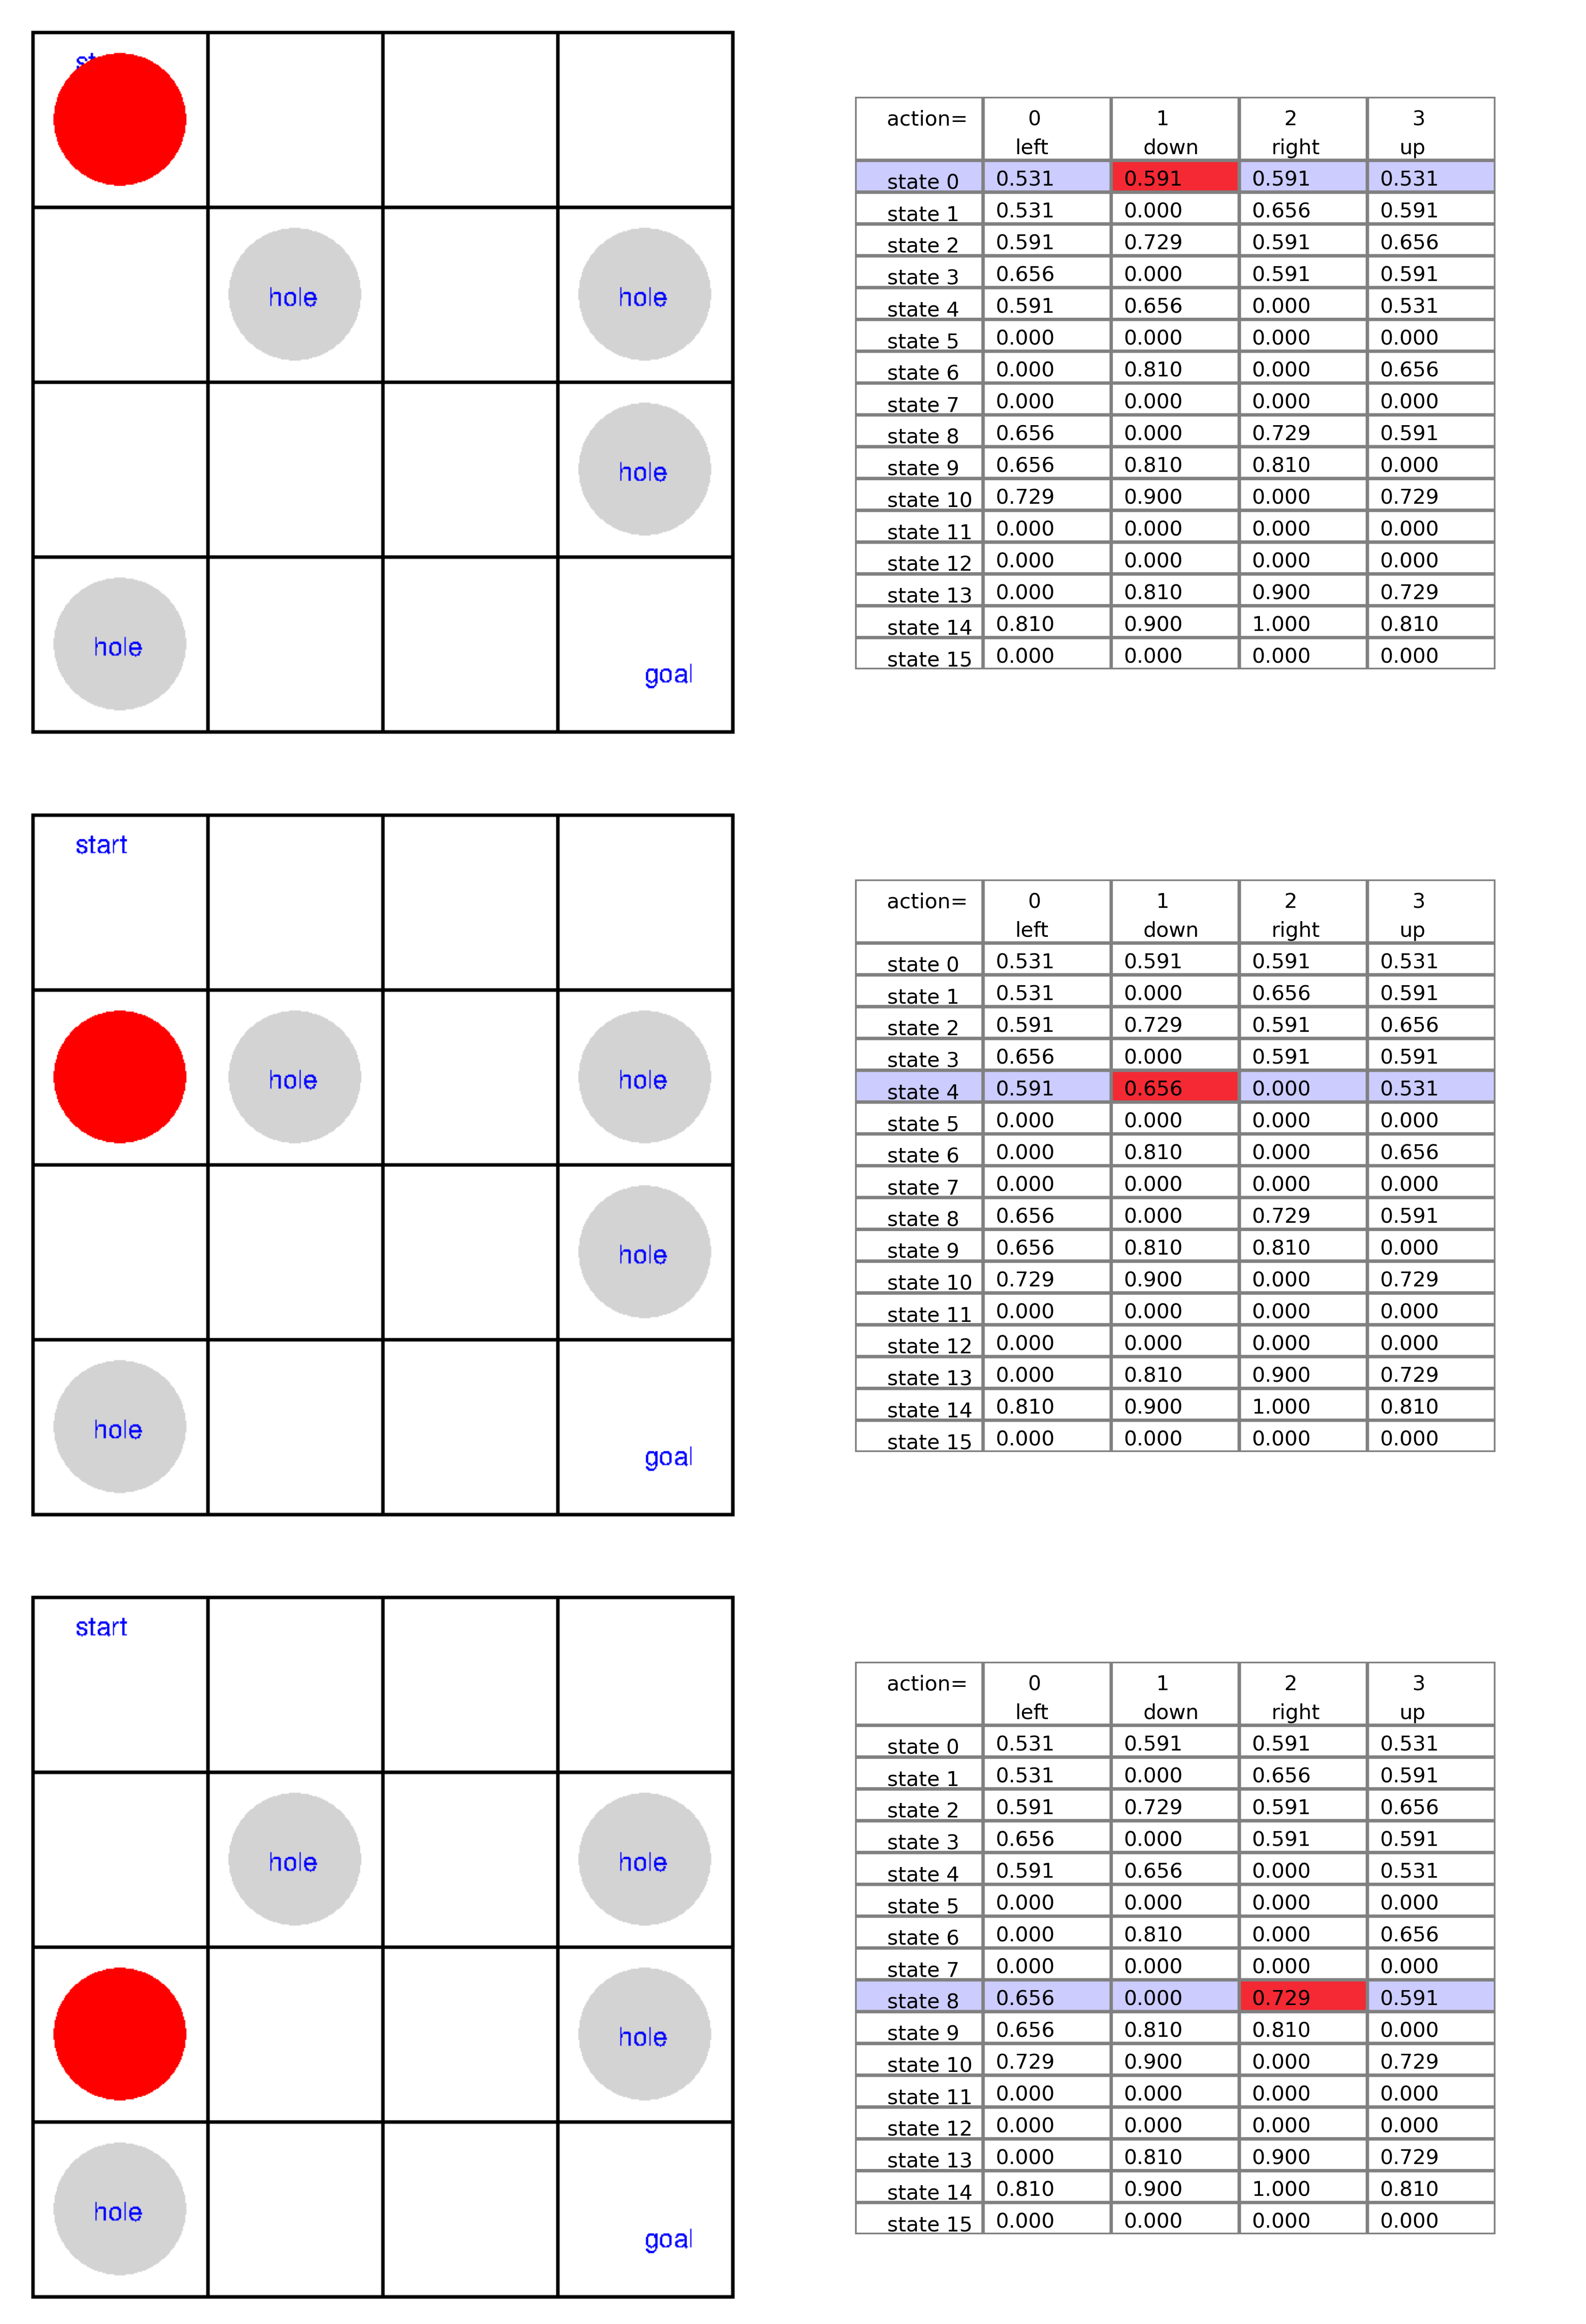

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,30),dpi=200)
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.imshow(subplot_frames[i])
    plt.axis('off')
plt.subplots_adjust(bottom=0.001,right=0.999,top=0.999,
        left=0.001, hspace=-0.01,wspace=-0.22)
plt.savefig("files/ch14/subplots_frozen1.png")

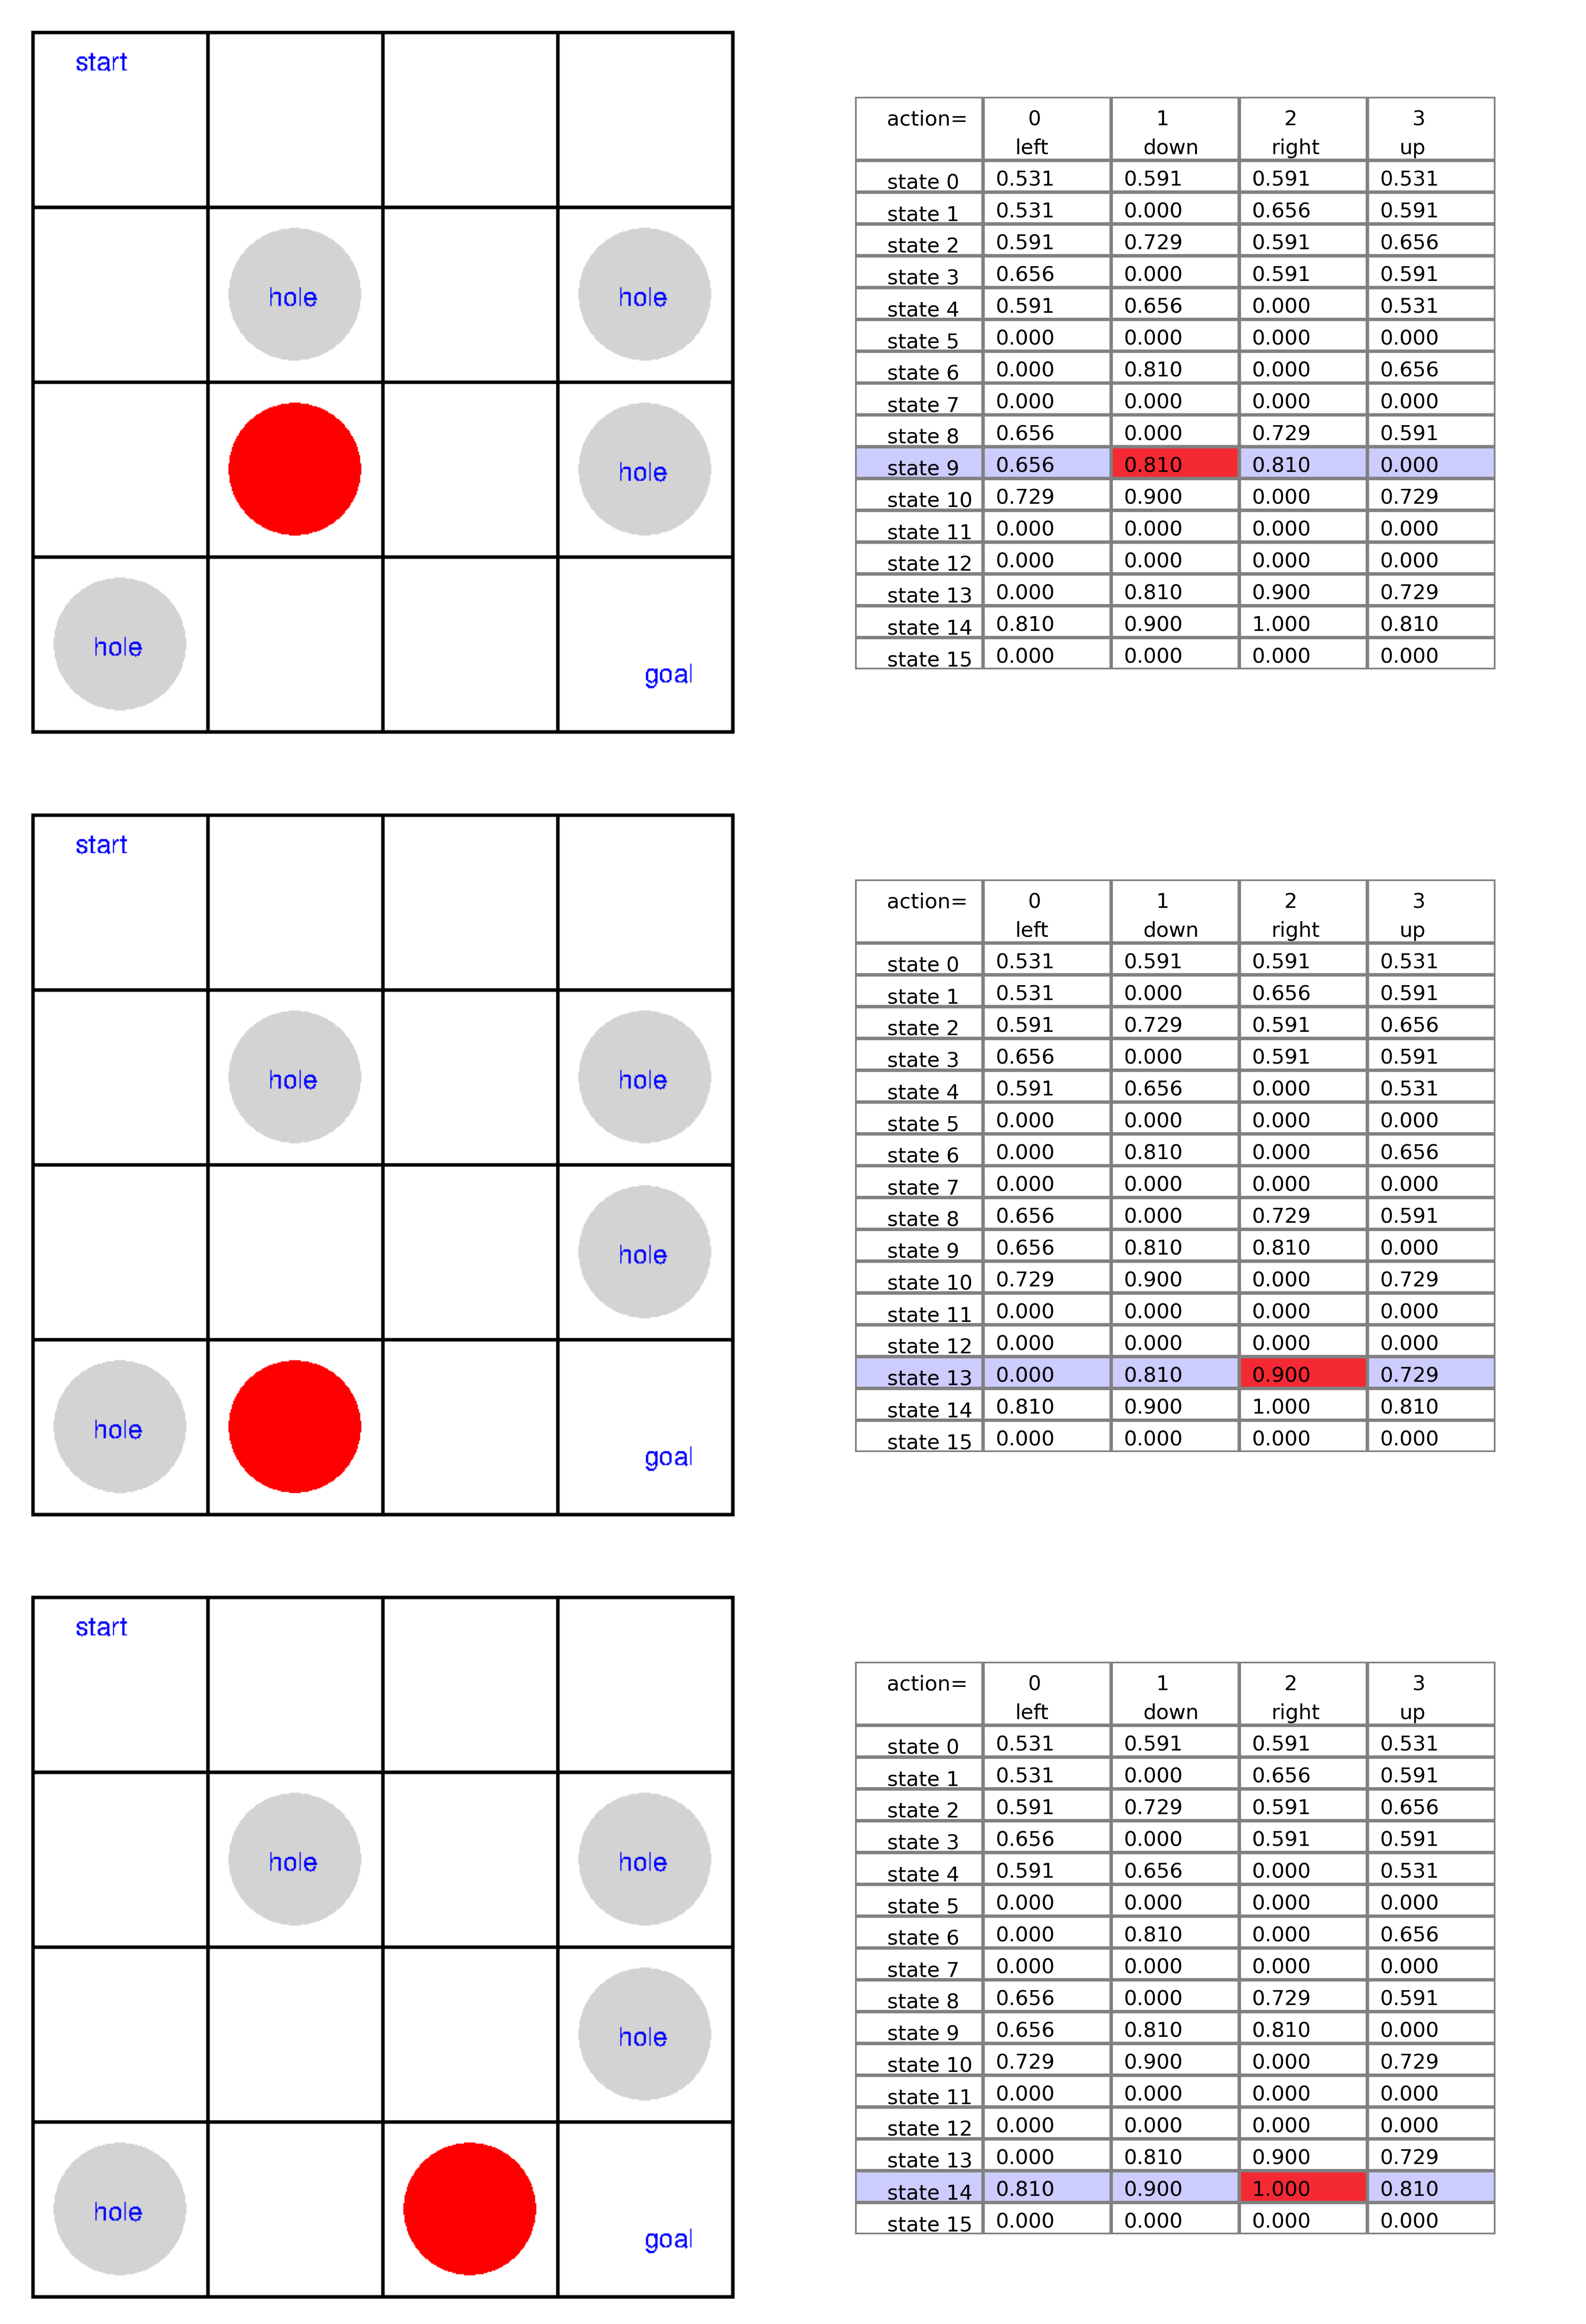

In [17]:
plt.figure(figsize=(20,30),dpi=200)
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.imshow(subplot_frames[i+3])
    plt.axis('off')
plt.subplots_adjust(bottom=0.001,right=0.999,top=0.999,
        left=0.001, hspace=-0.01,wspace=-0.22)
plt.savefig("files/ch14/subplots_frozen2.png")

# 14.7 Exercises

In [18]:
# answer to question 14.1
import numpy as np

Q=np.loadtxt('files/ch14/trained_Q.csv', delimiter=",")
def play_game():
    state=env.reset()
    env.render()
    while True:
        action=np.argmax(Q[state,:])
        print(f'current state is {state} and action is {action}')
        state,reward,done,_=env.step(action)
        env.render()
        if done==True:
            if reward==1:
                print('Congratulations, you won!')
            else:
                print('Sorry, better luck next time.')
            break 

import gym

env=gym.make('FrozenLake-v0',is_slippery=False)
env.reset()
play_game()
env.close()


SFFF
FHFH
FFFH
HFFG
current state is 0 and action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
current state is 4 and action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
current state is 8 and action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
current state is 9 and action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
current state is 13 and action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
current state is 14 and action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Congratulations, you won!


In [19]:
# answer to question 14.2
lr=0.7
gamma=0.95
max_exp=0.7
min_exp=0.3
max_steps=50
max_episode=10000

# Set Q-values to zeros at first 
Q=np.zeros((16, 4))
# Train the Q-table for 10,000 episodes
env.reset()
for episode in range(max_episode):
    update_Q(episode)
# Print out and save the trained Q-table   
Q=np.round(Q,4)
print(Q) 
np.savetxt("files/ch14/new_trained_Q.csv",Q,delimiter=',')

[[0.7351 0.7738 0.7738 0.7351]
 [0.7351 0.     0.8145 0.7738]
 [0.7738 0.8574 0.7738 0.8145]
 [0.8145 0.     0.7738 0.7738]
 [0.7738 0.8145 0.     0.7351]
 [0.     0.     0.     0.    ]
 [0.     0.9025 0.     0.8145]
 [0.     0.     0.     0.    ]
 [0.8145 0.     0.8574 0.7738]
 [0.8145 0.9025 0.9025 0.    ]
 [0.8574 0.95   0.     0.8574]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.9025 0.95   0.8574]
 [0.9025 0.95   1.     0.9025]
 [0.     0.     0.     0.    ]]


In [20]:
# answer to question 14.3
import time
# Use the Q-table you just trained
Q=np.loadtxt('files/ch14/new_trained_Q.csv',delimiter=",")
def use_trained_Q():
    state=env.reset()
    env.render()
    while True:
        # Show the game board for 1 second
        time.sleep(1)
        # Choose the action with the highest Q
        action=np.argmax(Q[state,:])
        print(f'the state is {state}; the action is {action}')
        state, reward, done, _ = env.step(action)
        env.render()
        if done==True:
            if reward ==1:
                print('Congratulations, you won!')
            else:
                print('Sorry, better luck next time.')
            break    
use_trained_Q()
time.sleep(5)
env.close()


SFFF
FHFH
FFFH
HFFG
the state is 0; the action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
the state is 4; the action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
the state is 8; the action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
the state is 9; the action is 1
  (Down)
SFFF
FHFH
FFFH
HFFG
the state is 13; the action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
the state is 14; the action is 2
  (Right)
SFFF
FHFH
FFFH
HFFG
Congratulations, you won!
